In [1]:
from csidh import CSIDHDLL
PATH = "/home/xjaros2/Documents/git/csidh-setup/csidh-target/src/"
csidhdll = CSIDHDLL(src_path=PATH)

-- Configuring done (0.0s)
-- Generating done (0.0s)
-- Build files have been written to: /home/xjaros2/Documents/git/csidh-setup/csidh-target/src/build
[100%] Built target csidh


In [2]:
csidhdll.public = 0
csidhdll.private = [1,0,-1]
csidhdll.from_projective(csidhdll.action())

15

In [6]:
raw_nodes = {}
raw_edges = []

privates = [
    (3,[1,0,0]),
    (3,[-1,0,0]),
    (5,[0,1,0]),
    (5,[0,-1,0]),
    (7,[0,0,1]),
    (7,[0,0,-1])
    
]


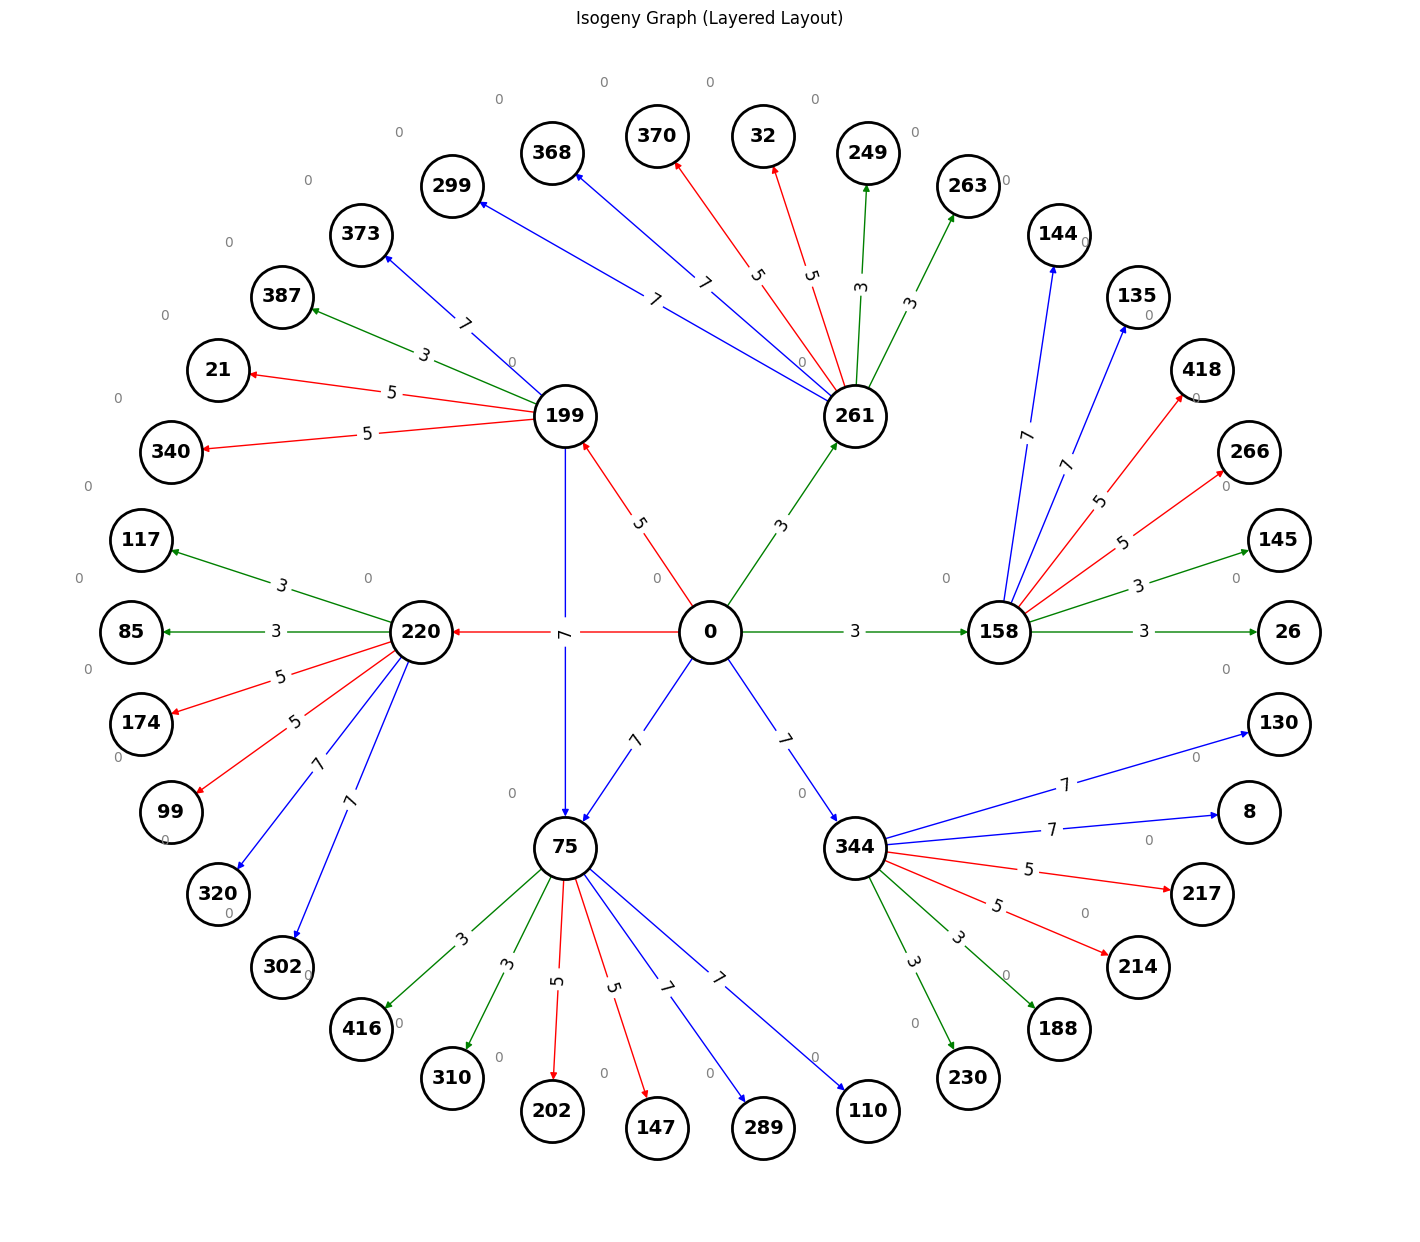

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from collections import deque, defaultdict

# === Ensure All Nodes Exist ===
for u, v, _ in raw_edges:
    if u not in raw_nodes:
        raw_nodes[u] = (u, 0)
    if v not in raw_nodes:
        raw_nodes[v] = (v, 0)

# === Create Graph ===
G = nx.DiGraph()
for node, (main, small) in raw_nodes.items():
    G.add_node(node, main=main, small=small)
for u, v, w in raw_edges:
    G.add_edge(u, v, weight=w)

# === Multi-root BFS for All Components ===
layers = defaultdict(list)
visited = set()
depth_map = {}
max_depth_seen = 0

for start in G.nodes():
    if start in visited:
        continue
    queue = deque([(start, 0)])
    while queue:
        node, depth = queue.popleft()
        if node in visited:
            continue
        visited.add(node)
        layers[depth].append(node)
        depth_map[node] = depth
        max_depth_seen = max(max_depth_seen, depth)
        for neighbor in G.successors(node):
            if neighbor not in visited:
                queue.append((neighbor, depth + 1))

# === Assign Positions ===
pos = {}
radius_step = 2.5
for depth, nodes in layers.items():
    radius = depth * radius_step
    angle_step = 2 * math.pi / max(len(nodes), 1)
    for i, node in enumerate(nodes):
        angle = i * angle_step
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        pos[node] = (x, y)

# === Edge Colors by Weight ===
edge_colors = []
for u, v in G.edges():
    w = G[u][v]['weight']
    if w == 3:
        edge_colors.append("green")
    elif w == 5:
        edge_colors.append("red")
    elif w == 7:
        edge_colors.append("blue")
    else:
        edge_colors.append("gray")

# === Draw the Graph ===
plt.figure(figsize=(14, 12))
nx.draw(G, pos, with_labels=False, node_color="white", edgecolors="black",
        edge_color=edge_colors, node_size=2000, linewidths=2)

# === Node Labels ===
for node in G.nodes():
    x, y = pos[node]
    plt.text(x, y, str(G.nodes[node]['main']), fontsize=14, fontweight="bold",
             ha='center', va='center', color="black")
    plt.text(x - 0.5, y + 0.5, str(G.nodes[node]['small']), fontsize=10, color="gray")

# === Edge Labels ===
edge_labels = {(u, v): str(G[u][v]['weight']) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.axis('off')
plt.title("Isogeny Graph (Layered Layout)")
plt.savefig("isogeny-graph.pdf")
plt.show()


In [5]:
isogeny_in_distance(isogeny_in_distance(0, 0)[0], 0)[0]

NameError: name 'isogeny_in_distance' is not defined

In [ ]:
isogeny_in_distance(isogeny_in_distance(0, 1)[1], 1)[1]

In [ ]:
isogeny_in_distance(isogeny_in_distance(0, 2)[0], 2)[0]

In [ ]:
stats = {
    "Total" : len(df),
    "Normal": len(df[df.type == "NORMAL"]),
    "Reset" : len(df[df.type == "RESET"]),
    "Changing": len(df[df.type == "CHANGING"]),
    "Justright": len(df[df.type == "JUSTRIGHT"]),
}

def shorten(pair):
    fst = f"(+){pair[0]}" if pair[0] > 0 else f"(-){-pair[0]}"
    snd = f"(+){pair[1]}" if pair[1] > 0 else f"(-){-pair[1]}"
    return f"{fst}{snd}"


distance2 = 0
for key, degrees in DOUBLE_ISOGENY_SKIP_PUBLICS.items():
    label = list(map(shorten, set(map(tuple,map(sorted, degrees)))))
    count = len(df[df.responses.apply(lambda x: key in x)])
    distance2 += count
    stats[';'.join(label) + f"-{key}"] = count


distance1 = 0
for key in isogeny_in_distance(0, 1) + isogeny_in_distance(0, 2) + isogeny_in_distance(0, 0):
    count = len(df[df.responses.apply(lambda x: key in x)])
    distance1 += count

garbage = 0
DISTANCE12 = isogeny_in_distance(0, 1) + isogeny_in_distance(0, 2) + isogeny_in_distance(0, 0) + list(DOUBLE_ISOGENY_SKIP_PUBLICS.keys())
print(DISTANCE12)
df[~df.type.isin(["NORMAL", "RESET"]) & df.responses & df.responses.apply(lambda x: not any([key in x for key in DISTANCE12]))]
867/52699

In [ ]:
stats

In [ ]:
percentages = {}
for key in stats:
    percentages[key] =100 *stats[key] / stats["Total"]
percentages

In [ ]:
csidhdll.public = csidhdll.to_projective(0)
private = [0, 0, -2]
csidhdll.private = private
positive_isogeny_skipped =  csidhdll.from_projective(csidhdll.action())
positive_isogeny_skipped

In [ ]:
sum([0.015180553710696598,
0.0,
0.2409912901573085,
 0.3662308582705554,
 0.037951384276741496,
 0.13282984496859523,
0.07400519933964592,
0.4971631340253136,
0.16319095238998843,
 0.12903470654092108,
0.46110931896240914,
0.21442532116358945,
0.9544773145600486,
0.35484544298753296,
0.03605381506290442,
0.34156245849067346,
0.053131937987438094])